# **Waste Material Segregation for Improving Waste Management**

## **Objective**

The objective of this project is to implement an effective waste material segregation system using convolutional neural networks (CNNs) that categorises waste into distinct groups. This process enhances recycling efficiency, minimises environmental pollution, and promotes sustainable waste management practices.

The key goals are:

* Accurately classify waste materials into categories like cardboard, glass, paper, and plastic.
* Improve waste segregation efficiency to support recycling and reduce landfill waste.
* Understand the properties of different waste materials to optimise sorting methods for sustainability.

## **Data Understanding**

The Dataset consists of images of some common waste materials.

1. Food Waste
2. Metal
3. Paper
4. Plastic
5. Other
6. Cardboard
7. Glass


**Data Description**

* The dataset consists of multiple folders, each representing a specific class, such as `Cardboard`, `Food_Waste`, and `Metal`.
* Within each folder, there are images of objects that belong to that category.
* However, these items are not further subcategorised. <br> For instance, the `Food_Waste` folder may contain images of items like coffee grounds, teabags, and fruit peels, without explicitly stating that they are actually coffee grounds or teabags.

## **1. Load the data**

Load and unzip the dataset zip file.

**Import Necessary Libraries**

In [1]:
# Recommended versions:

# numpy version: 1.26.4
# pandas version: 2.2.2
# seaborn version: 0.13.2
# matplotlib version: 3.10.0
# PIL version: 11.1.0
# tensorflow version: 2.18.0
# keras version: 3.8.0
# sklearn version: 1.6.1

In [2]:
# Import essential libraries
import sys
import os
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
import PIL
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
print(f"Python version: {sys.version}")
print(f"numpy version: {np.__version__}")
print(f"pandas version: {pd.__version__}")
print(f"seaborn version: {sns.__version__}")
print(f"matplotlib version: {matplotlib.__version__}")
print(f"PIL version: {PIL.__version__}")
print(f"tensorflow version: {tf.__version__}")
print(f"keras version: {keras.__version__}")
print(f"sklearn version: {sklearn.__version__}")

Python version: 3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]
numpy version: 2.0.2
pandas version: 2.2.2
seaborn version: 0.13.2
matplotlib version: 3.10.0
PIL version: 11.3.0
tensorflow version: 2.19.0
keras version: 3.10.0
sklearn version: 1.6.1


Load the dataset.

In [4]:
# Load and unzip the dataset
os.mkdir('/data')
os.chdir('/data')
os.getcwd()
!wget https://woolfaws-prod.s3.ap-south-1.amazonaws.com/sharepoint_zips/Dataset_Waste_Segregation.zip -O /data/Dataset_Waste_Segregation.zip
!unzip /data/Dataset_Waste_Segregation.zip -d /data/
!unzip /data/Dataset_Waste_Segregation/Dataset_Waste_Segregation/data.zip -d /data/
!rm -rv /data/Dataset_Waste_Segregation
!rm -v /data/Dataset_Waste_Segregation.zip
!mv -v /data/data/* ./
!rm -rv data
!ls -lh

Streaming output truncated to the last 5000 lines.
  inflating: /data/data/Glass/file_420.png  
  inflating: /data/data/Glass/file_740.png  
  inflating: /data/data/Glass/file_458.png  
  inflating: /data/data/Glass/file_519.png  
  inflating: /data/data/Glass/file_162.png  
  inflating: /data/data/Glass/file_255.png  
  inflating: /data/data/Glass/file_47.png  
  inflating: /data/data/Glass/file_466.png  
  inflating: /data/data/Glass/file_593.png  
  inflating: /data/data/Glass/file_712.png  
  inflating: /data/data/Glass/file_611.png  
  inflating: /data/data/Glass/file_267.png  
  inflating: /data/data/Glass/file_296.png  
  inflating: /data/data/Glass/file_518.png  
  inflating: /data/data/Glass/file_555.png  
  inflating: /data/data/Glass/file_648.png  
  inflating: /data/data/Glass/file_70.png  
  inflating: /data/data/Glass/file_100.png  
  inflating: /data/data/Glass/file_32.png  
  inflating: /data/data/Glass/file_225.png  
  inflating: /data/data/Glass/file_111.png  
  infla

## **2. Data Preparation** <font color=red> [25 marks] </font><br>


### **2.1 Load and Preprocess Images** <font color=red> [8 marks] </font><br>

Let us create a function to load the images first. We can then directly use this function while loading images of the different categories to load and crop them in a single step.

#### **2.1.1** <font color=red> [3 marks] </font><br>
Create a function to load the images.

In [5]:
# Create a function to load the raw images
def load_image(image_path):
    img = Image.open(image_path).convert('RGB')
    return img

#### **2.1.2** <font color=red> [5 marks] </font><br>
Load images and labels.

Load the images from the dataset directory. Labels of images are present in the subdirectories.

Verify if the images and labels are loaded correctly.

In [6]:
# Get the images and their labels
data_dir = '/data'
image_paths = []
labels = []

for class_name in os.listdir(data_dir):
    class_dir = os.path.join(data_dir, class_name)
    if os.path.isdir(class_dir):
        for image_name in os.listdir(class_dir):
            image_path = os.path.join(class_dir, image_name)
            if os.path.isfile(image_path):
                try:
                    img = load_image(image_path)  # Use the load_image function
                    image_paths.append(image_path)
                    labels.append(class_name)
                except Exception as e:
                    print(f"Error loading image {image_path}: {e}")

print(f"Number of images loaded: {len(image_paths)}")
print(f"Number of labels loaded: {len(labels)}")

Number of images loaded: 7625
Number of labels loaded: 7625


Perform any operations, if needed, on the images and labels to get them into the desired format.

### **2.2 Data Visualisation** <font color=red> [9 marks] </font><br>

#### **2.2.1** <font color=red> [3 marks] </font><br>
Create a bar plot to display the class distribution

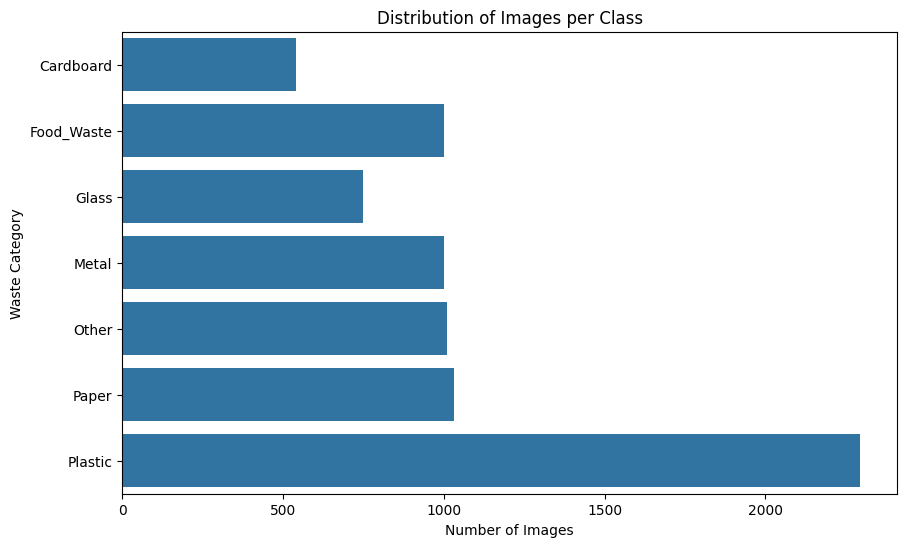

In [7]:
# Visualise Data Distribution
plt.figure(figsize=(10, 6))
sns.countplot(y=labels, order=sorted(list(set(labels))))
plt.title('Distribution of Images per Class')
plt.xlabel('Number of Images')
plt.ylabel('Waste Category')
plt.show()

#### **2.2.2** <font color=red> [3 marks] </font><br>
Visualise some sample images

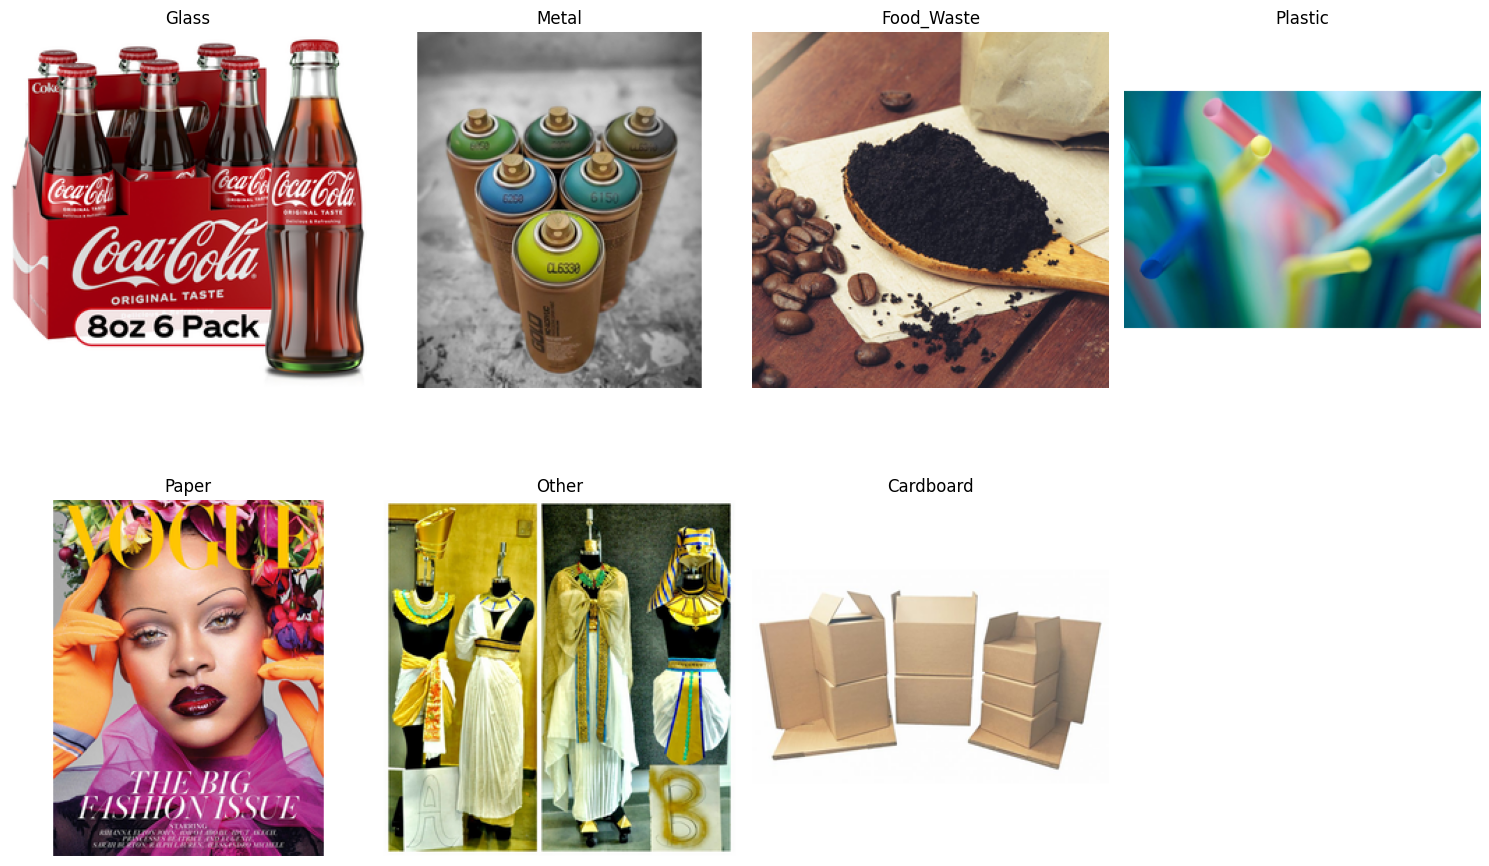

In [8]:
# Visualise Sample Images (across different labels)
unique_labels = list(set(labels))
plt.figure(figsize=(15, 10))
for i, label in enumerate(unique_labels):
    # Find the index of the first image with this label
    index = labels.index(label)
    image_path = image_paths[index]
    img = load_image(image_path)

    plt.subplot(2, 4, i + 1)
    plt.imshow(img)
    plt.title(label)
    plt.axis('off')

plt.tight_layout()
plt.show()

#### **2.2.3** <font color=red> [3 marks] </font><br>
Based on the smallest and largest image dimensions, resize the images.

In [9]:
# Find the smallest and largest image dimensions from the data set
min_width = float('inf')
min_height = float('inf')
max_width = 0
max_height = 0

for image_path in image_paths:
    with Image.open(image_path) as img:
        width, height = img.size
        min_width = min(min_width, width)
        min_height = min(min_height, height)
        max_width = max(max_width, width)
        max_height = max(max_height, height)

print(f"Smallest dimensions: {min_width}x{min_height}")
print(f"Largest dimensions: {max_width}x{max_height}")

Smallest dimensions: 256x256
Largest dimensions: 256x256


In [10]:
# Resize the image dimensions
target_size = (128, 128)

resized_images = []
for image_path in image_paths:
    img = load_image(image_path)
    img_resized = img.resize(target_size)
    resized_images.append(np.array(img_resized))

# Convert the list of arrays to a numpy array
resized_images = np.array(resized_images)

print(f"Shape of resized images array: {resized_images.shape}")

Shape of resized images array: (7625, 128, 128, 3)


### **2.3 Encoding the classes** <font color=red> [3 marks] </font><br>

There are seven classes present in the data.

We have extracted the images and their labels, and visualised their distribution. Now, we need to perform encoding on the labels. Encode the labels suitably.

####**2.3.1** <font color=red> [3 marks] </font><br>
Encode the target class labels.

In [11]:
# Encode the labels suitably
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Use LabelEncoder to convert string labels to integers
label_encoder = LabelEncoder()
integer_encoded_labels = label_encoder.fit_transform(labels)

# Use OneHotEncoder to convert integer labels to one-hot encoded vectors
onehot_encoded_labels = tf.keras.utils.to_categorical(integer_encoded_labels, 7)

print(f"Original labels (first 5): {labels[:5]}")
print(f"Integer encoded labels (first 5): {integer_encoded_labels[:5].flatten()}")
print(f"One-hot encoded labels (first 5): {onehot_encoded_labels[:5]}")
print(f"Shape of one-hot encoded labels: {onehot_encoded_labels.shape}")

Original labels (first 5): ['Glass', 'Glass', 'Glass', 'Glass', 'Glass']
Integer encoded labels (first 5): [2 2 2 2 2]
One-hot encoded labels (first 5): [[0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]]
Shape of one-hot encoded labels: (7625, 7)


### **2.4 Data Splitting** <font color=red> [5 marks] </font><br>

#### **2.4.1** <font color=red> [5 marks] </font><br>
Split the dataset into training and validation sets

In [12]:
# Assign specified parts of the dataset to train and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    resized_images,
    onehot_encoded_labels,
    test_size=0.3,
    random_state=42, # for reproducibility
    stratify=onehot_encoded_labels # to maintain class distribution
)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_val: {X_val.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_val: {y_val.shape}")


Shape of X_train: (5337, 128, 128, 3)
Shape of X_val: (2288, 128, 128, 3)
Shape of y_train: (5337, 7)
Shape of y_val: (2288, 7)


## **3. Model Building and Evaluation** <font color=red> [20 marks] </font><br>

### **3.1 Model building and training** <font color=red> [15 marks] </font><br>

#### **3.1.1** <font color=red> [10 marks] </font><br>
Build and compile the model. Use 3 convolutional layers. Add suitable normalisation, dropout, and fully connected layers to the model.

Test out different configurations and report the results in conclusions.

##### **Model Configuration 1**

In [13]:
# Build and compile the model
model_1 = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),

    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(unique_labels), activation='softmax')
])

model_1.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model_1.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 14, 14, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,306,055 (12.61 MB)

 Trainable params: 3,305,799 (12.61 MB)

 Non-trainable params: 256 (1.00 KB)

##### **Model Configuration 2**
Adding more number of Batch Normalization layers

In [14]:
# Build and compile the model
model_2 = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),

    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(unique_labels), activation='softmax')
])

model_2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model_2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 63, 63, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 30, 30, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 14, 14, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,306,439 (12.61 MB)

 Trainable params: 3,305,991 (12.61 MB)

 Non-trainable params: 448 (1.75 KB)

##### **Model Configuration 3**
Adding one more dense layers of 128 neurons.

In [15]:
# Build and compile the model
model_3 = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),

    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(unique_labels), activation='softmax')
])

model_3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model_3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 63, 63, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 30, 30, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 14, 14, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,322,951 (12.68 MB)

 Trainable params: 3,322,503 (12.67 MB)

 Non-trainable params: 448 (1.75 KB)

#### **3.1.2** <font color=red> [5 marks] </font><br>
Train the model.

Use appropriate metrics and callbacks as needed.

In [16]:
# Training
# Define callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.001)

# Train the model

##### **Training configuration 1**

In [17]:
history_1 = model_1.fit(
    X_train,
    y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_val, y_val)
)

Epoch 1/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 18s 58ms/step - accuracy: 0.2401 - loss: 3.6197 - val_accuracy: 0.3112 - val_loss: 1.9200
Epoch 2/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.3464 - loss: 1.7646 - val_accuracy: 0.1792 - val_loss: 11.1335
Epoch 3/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.3731 - loss: 1.6939 - val_accuracy: 0.2570 - val_loss: 1.9718
Epoch 4/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.3673 - loss: 1.6673 - val_accuracy: 0.3304 - val_loss: 3.4681
Epoch 5/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.3895 - loss: 1.5758 - val_accuracy: 0.3947 - val_loss: 1.7729
Epoch 6/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.4219 - loss: 1.5357 - val_accuracy: 0.3291 - val_loss: 5.2891
Epoch 7/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.4049 - loss: 1.5208 - val_accuracy: 0.4191 - val_loss: 1.5891
Epoch 8/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.4199 - loss: 1.4898 - val_ac

##### **Training configuration 2**

In [18]:
history_2 = model_2.fit(
    X_train,
    y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 17s 61ms/step - accuracy: 0.2342 - loss: 4.3379 - val_accuracy: 0.2920 - val_loss: 7.2669 - learning_rate: 0.0010
Epoch 2/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.3010 - loss: 2.0516 - val_accuracy: 0.3300 - val_loss: 1.8764 - learning_rate: 0.0010
Epoch 3/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.3322 - loss: 1.7700 - val_accuracy: 0.3497 - val_loss: 1.7606 - learning_rate: 0.0010
Epoch 4/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.3704 - loss: 1.6498 - val_accuracy: 0.3427 - val_loss: 1.7460 - learning_rate: 0.0010
Epoch 5/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.3917 - loss: 1.5772 - val_accuracy: 0.3837 - val_loss: 1.8688 - learning_rate: 0.0010
Epoch 6/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.3863 - loss: 1.5527 - val_accuracy: 0.3982 - val_loss: 1.7726 - learning_rate: 0.0010
Epoch 7/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.4139 - loss: 1

##### **Training configuration 3**

In [19]:
history_3 = model_3.fit(
    X_train,
    y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_val, y_val)
)

Epoch 1/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 18s 63ms/step - accuracy: 0.2045 - loss: 4.4856 - val_accuracy: 0.2867 - val_loss: 2.2237
Epoch 2/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.2510 - loss: 2.2575 - val_accuracy: 0.2920 - val_loss: 2.0467
Epoch 3/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.2759 - loss: 1.9915 - val_accuracy: 0.3121 - val_loss: 1.8207
Epoch 4/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.3059 - loss: 1.8520 - val_accuracy: 0.3090 - val_loss: 1.7794
Epoch 5/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.2999 - loss: 1.8263 - val_accuracy: 0.3151 - val_loss: 1.9260
Epoch 6/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.2961 - loss: 1.8189 - val_accuracy: 0.3199 - val_loss: 1.7222
Epoch 7/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.3103 - loss: 1.7597 - val_accuracy: 0.3265 - val_loss: 1.7108
Epoch 8/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.3186 - loss: 1.7472 - val_acc

### **3.2 Model Testing and Evaluation** <font color=red> [5 marks] </font><br>

#### **3.2.1** <font color=red> [5 marks] </font><br>
Evaluate the model on test dataset. Derive appropriate metrics.

In [20]:
# Evaluate on the validation set for each model
print("--- Evaluation for Model 1 ---")
loss_1, accuracy_1 = model_1.evaluate(X_val, y_val)
print(f"Validation Loss: {loss_1:.4f}")
print(f"Validation Accuracy: {accuracy_1:.4f}")

print("\n--- Evaluation for Model 2 ---")
loss_2, accuracy_2 = model_2.evaluate(X_val, y_val)
print(f"Validation Loss: {loss_2:.4f}")
print(f"Validation Accuracy: {accuracy_2:.4f}")

print("\n--- Evaluation for Model 3 ---")
loss_3, accuracy_3 = model_3.evaluate(X_val, y_val)
print(f"Validation Loss: {loss_3:.4f}")
print(f"Validation Accuracy: {accuracy_3:.4f}")

--- Evaluation for Model 1 ---
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6266 - loss: 1.4553
Validation Loss: 1.4898
Validation Accuracy: 0.6136

--- Evaluation for Model 2 ---
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4368 - loss: 1.4797
Validation Loss: 1.5232
Validation Accuracy: 0.4161

--- Evaluation for Model 3 ---
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6075 - loss: 1.2093
Validation Loss: 1.2340
Validation Accuracy: 0.5948


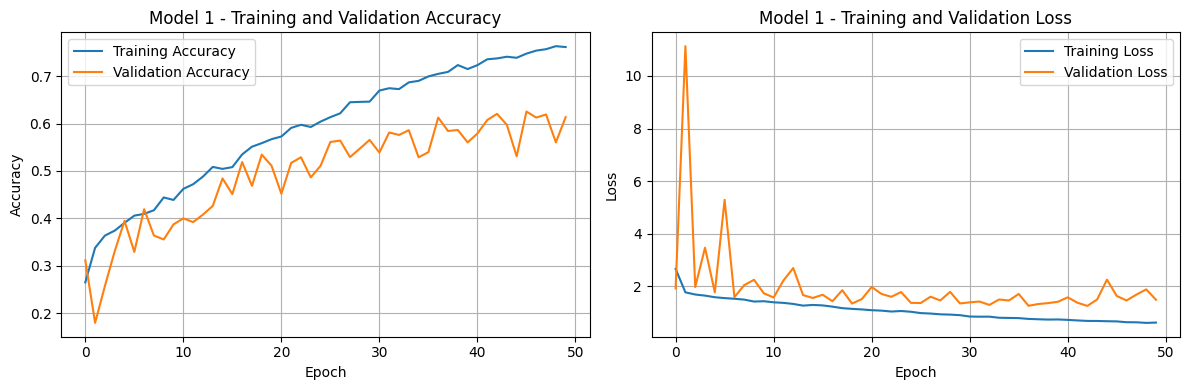

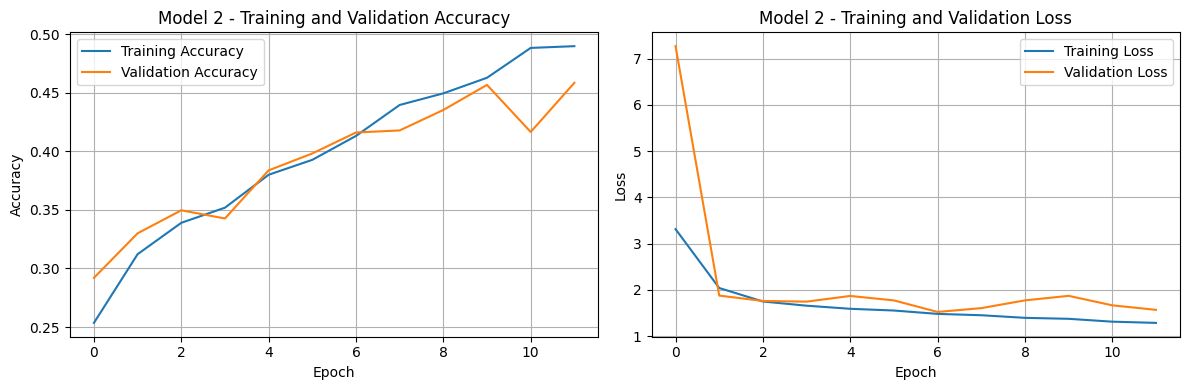

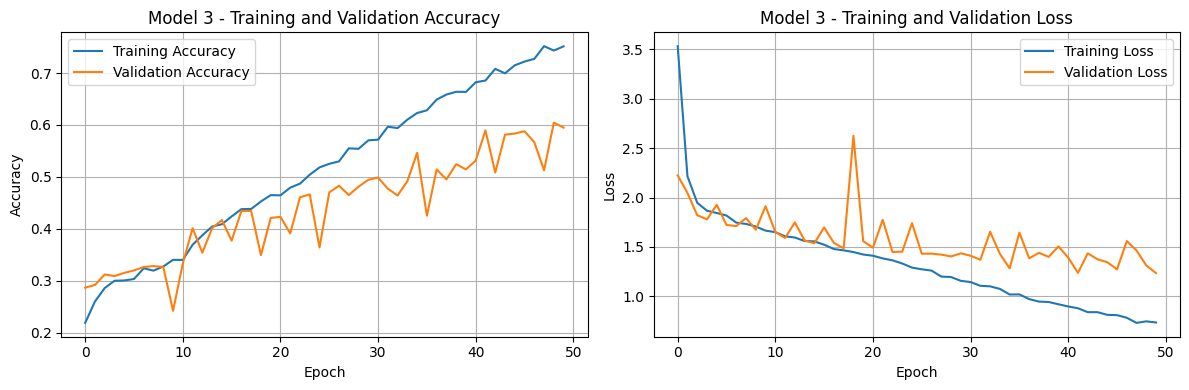

167/167 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step


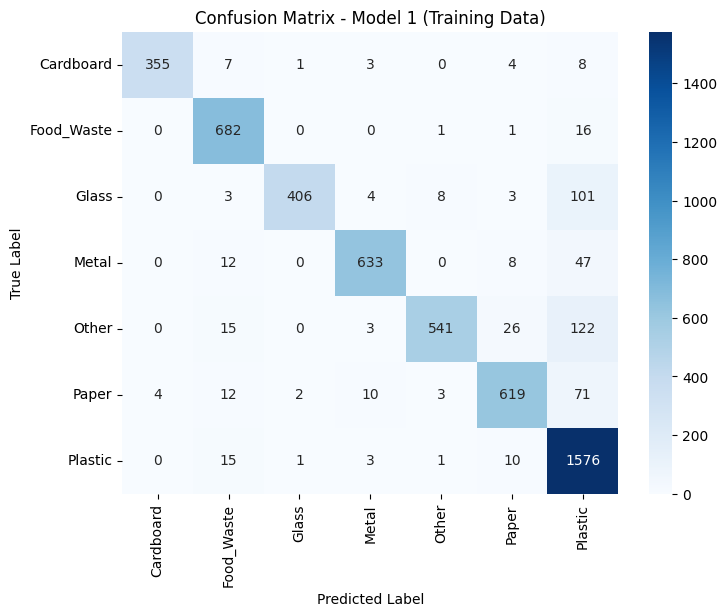

72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


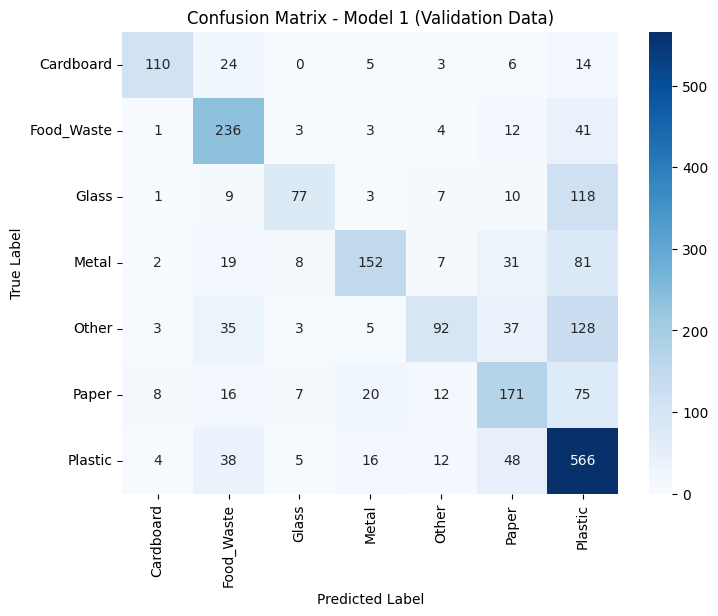

167/167 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step


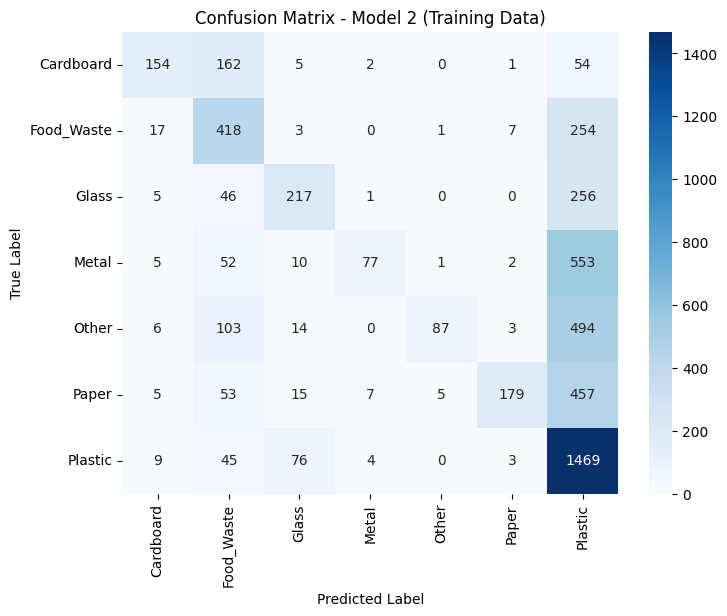

72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


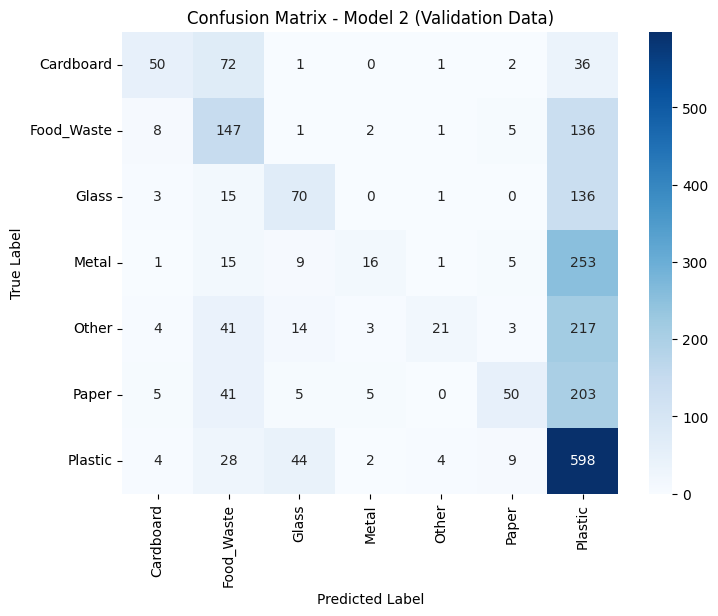

167/167 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step


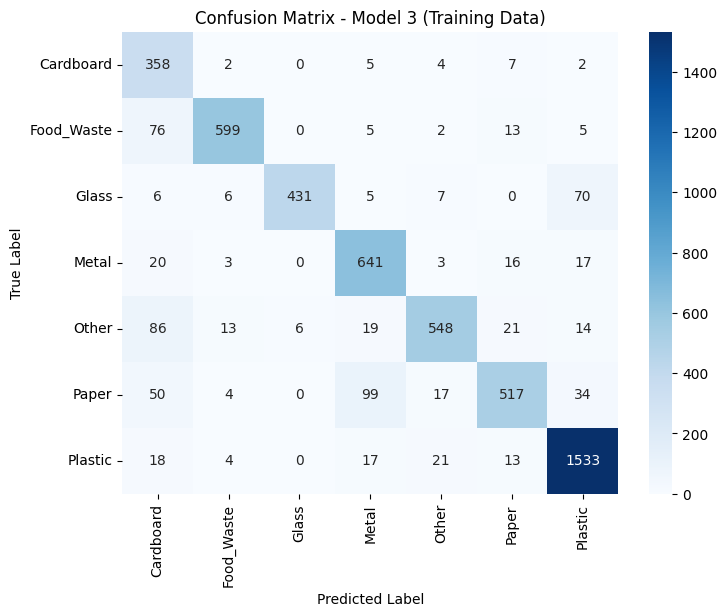

72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


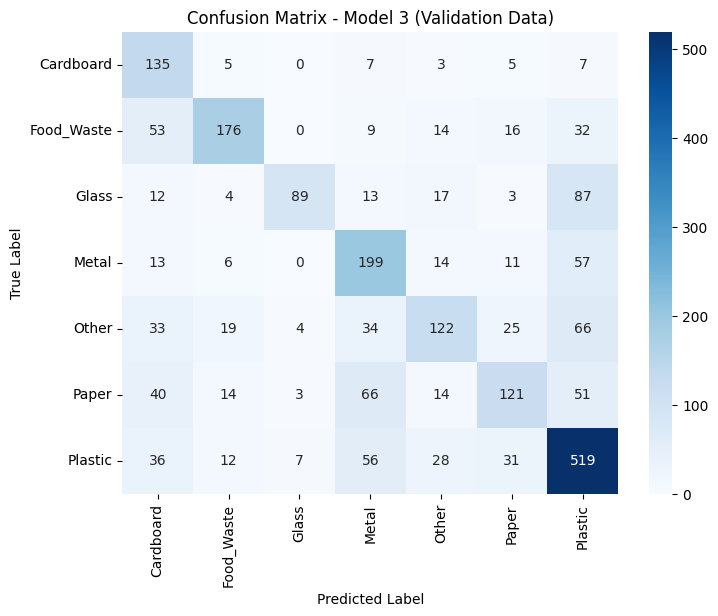

In [21]:
# Visualize training history for each model
def plot_training_history(history, title):
    plt.figure(figsize=(12, 4))

    # Plot training and validation accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{title} - Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    # Plot training and validation loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{title} - Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

plot_training_history(history_1, "Model 1")
plot_training_history(history_2, "Model 2")
plot_training_history(history_3, "Model 3")


# Generate and display confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

def plot_confusion_matrix(model, X, y_true, title, labels):
    y_pred = model.predict(X)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(y_true, axis=1)
    cm = confusion_matrix(y_true_classes, y_pred_classes)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.title(f'Confusion Matrix - {title}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Get the class labels
class_labels = sorted(list(set(labels)))

# Plot confusion matrix for Model 1
plot_confusion_matrix(model_1, X_train, y_train, "Model 1 (Training Data)", class_labels)
plot_confusion_matrix(model_1, X_val, y_val, "Model 1 (Validation Data)", class_labels)

# Plot confusion matrix for Model 2
plot_confusion_matrix(model_2, X_train, y_train, "Model 2 (Training Data)", class_labels)
plot_confusion_matrix(model_2, X_val, y_val, "Model 2 (Validation Data)", class_labels)

# Plot confusion matrix for Model 3
plot_confusion_matrix(model_3, X_train, y_train, "Model 3 (Training Data)", class_labels)
plot_confusion_matrix(model_3, X_val, y_val, "Model 3 (Validation Data)", class_labels)

## **4. Data Augmentation** <font color=red> [optional] </font><br>

#### **4.1 Create a Data Augmentation Pipeline**

##### **4.1.1**
Define augmentation steps for the datasets.

In [22]:
# Define augmentation steps to augment images



Augment and resample the images.
In case of class imbalance, you can also perform adequate undersampling on the majority class and augment those images to ensure consistency in the input datasets for both classes.

Augment the images.

In [23]:
# Create a function to augment the images




In [24]:
# Create the augmented training dataset



##### **4.1.2**

Train the model on the new augmented dataset.

In [25]:
# Train the model using augmented images



## **5. Conclusions** <font color = red> [5 marks]</font>

#### **5.1 Conclude with outcomes and insights gained** <font color =red> [5 marks] </font>

* Report your findings about the data
* Report model training results

**Findings About the Data**

Based on the data analysis and model training, here are the key findings:
- The dataset consists of images of 7 different waste material categories: Cardboard, Food Waste, Glass, Metal, Other, Paper, and Plastic.
- The distribution of images across these classes was visualized using a bar plot, showing the number of images available for each category.
- The data have a slight class imbalance issue. The count of images tagged as plastic is significantly more than other labels.
- All images in the dataset have a consistent size of 256x256 pixels. For model training, these images were resized to 128x128 pixels to reduce the computational complexity and training time.
- The class labels were successfully encoded using one-hot encoding for use in the classification models.
- The dataset was split into training (70%) and validation (30%) sets, with stratification to ensure similar class distribution in both sets.

**Model Training Results**

Three different CNN model configurations were built and trained:

**Model 1**

This is a basic CNN with three convolutional layers, followed by max pooling, batch normalization, flatten, dropout, and dense layers.

Training was performed for 50 epochs without early stopping or learning rate reduction.
- Validation Accuracy: 61.36%
- Validation Loss: 1.4898

**Model 2**

This model is similar to Model 1, but with Batch Normalization layers added after each MaxPooling layer.

Training was performed for 50 epochs with Early Stopping and ReduceLROnPlateau callbacks.
- Validation Accuracy: 41.61%
- Validation Loss: 1.5232

**Model 3**

This model is similar to Model 2, but with an additional dense layer of 128 neurons and an additional dropout layer.

Training was performed for 50 epochs without early stopping or learning rate reduction.
- Validation Accuracy: 59.48%
- Validation Loss: 1.2340

**Comparison of Model Performance**

Comparing the validation accuracies, Model 1 achieved the highest accuracy of 61.36%, followed closely by Model 3 with 59.48%. Model 2 had the lowest validation accuracy of 41.61%.

- The training history plots show that Model 1 and Model 3 had similar training and validation loss and accuracy curves, with some fluctuations, suggesting potential for further optimization.
- Model 2 showed signs of overfitting early on, which was likely addressed by the callbacks, but still resulted in lower overall accuracy.
- However, it is noticed that traning the model for 50 epochs increases the model performance and the performance of Model 2 can be increase by removing early stopping and training to full 50 epochs.

The confusion matrices provide a detailed view of how each model performed on individual classes. They show which classes are being predicted correctly and where the models are making errors. For example, by examining the confusion matrices, we can identify which waste categories are most easily confused by each model.

**Conclusion**

Overall Model 1 appears to be the best-performing model among the three configurations tested based on validation accuracy. However, further experimentation with hyperparameters, data augmentation techniques, and potentially different model architectures could lead to improved performance.
